[I 2025-06-22 23:06:40,670] A new study created in memory with name: no-name-f53ab74b-8450-429f-a532-c27d544793c5


Usando dispositivo: cuda
Dimensiones del DataFrame: (3680, 20)

Primeras filas del DataFrame:
          id  id_bar  anio  semana  ESTRATO  area_barrio  dengue  \
0  4_2015_01       4  2015       1      3.0        0.560     0.0   
1  5_2015_01       5  2015       1      3.0        0.842     0.0   
2  3_2015_01       3  2015       1      1.0        0.781     0.0   
3  8_2015_01       8  2015       1      2.0        0.394     0.0   
4  9_2015_01       9  2015       1      2.0        0.292     0.0   

   concentraciones  vivienda  equipesado  sumideros  maquina  lluvia_mean  \
0              0.0       0.0         0.0        0.0      0.0     0.000651   
1              0.0       0.0         0.0        0.0      0.0     0.000651   
2              0.0       0.0         0.0        0.0      0.0     0.000651   
3              0.0       0.0         0.0        0.0      0.0     0.000651   
4              0.0       0.0         0.0        0.0      0.0     0.000651   

   lluvia_var  lluvia_max  lluvia_

  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-22 23:06:47,581] Trial 0 finished with value: 0.114104969226397 and parameters: {'window_size': 40, 'learning_rate': 0.002272376408107593, 'n_layers': 3, 'num_channels_base': 64, 'kernel_size': 4, 'dropout': 0.2488358459101943, 'batch_size': 32}. Best is trial 0 with value: 0.114104969226397.
[I 2025-06-22 23:06:50,064] Trial 1 finished with value: 0.16448300470565927 and parameters: {'window_size': 24, 'learning_rate': 0.009122521651004217, 'n_layers': 4, 'num_channels_base': 16, 'kernel_size': 4, 'dropout': 0.33284798347090894, 'batch_size': 128}. Best is trial 0 with value: 0.114104969226397.
[I 2025-06-22 23:06:52,829] Trial 2 finished with value: 0.2957117540610803 and parameters: {'window_size': 16, 'learning_rate': 0.0003512765505830216, 'n_layers': 2, 'num_channels_base': 32, 'kernel_size': 4, 'dropout': 0.21765201146896015, 'batch_size': 64}. Best is trial 0 with value: 0.114104969226397.
[I 2025-06-22 23:06:54,105] Trial 3 finished with value: 0.16363356257929945 a

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [10/200], Train MSE: 0.335842, Val MSE: 0.123562
Epoch [20/200], Train MSE: 0.291458, Val MSE: 0.075046
Epoch [30/200], Train MSE: 0.268787, Val MSE: 0.081739
Epoch [40/200], Train MSE: 0.261165, Val MSE: 0.077682
Epoch [50/200], Train MSE: 0.245213, Val MSE: 0.073372
Epoch [60/200], Train MSE: 0.252103, Val MSE: 0.104473
Epoch [70/200], Train MSE: 0.252075, Val MSE: 0.082016
Epoch [80/200], Train MSE: 0.242318, Val MSE: 0.089875
Epoch [90/200], Train MSE: 0.233485, Val MSE: 0.075601
Epoch [100/200], Train MSE: 0.216158, Val MSE: 0.106818
Epoch [110/200], Train MSE: 0.216258, Val MSE: 0.093665
Epoch [120/200], Train MSE: 0.214254, Val MSE: 0.091701
Epoch [130/200], Train MSE: 0.213576, Val MSE: 0.090932
Epoch [140/200], Train MSE: 0.214258, Val MSE: 0.089421
Epoch [150/200], Train MSE: 0.209724, Val MSE: 0.078839
Epoch [160/200], Train MSE: 0.203667, Val MSE: 0.091870
Epoch [170/200], Train MSE: 0.215022, Val MSE: 0.073148
Epoch [180/200], Train MSE: 0.205094, Val MSE: 0.081907
E

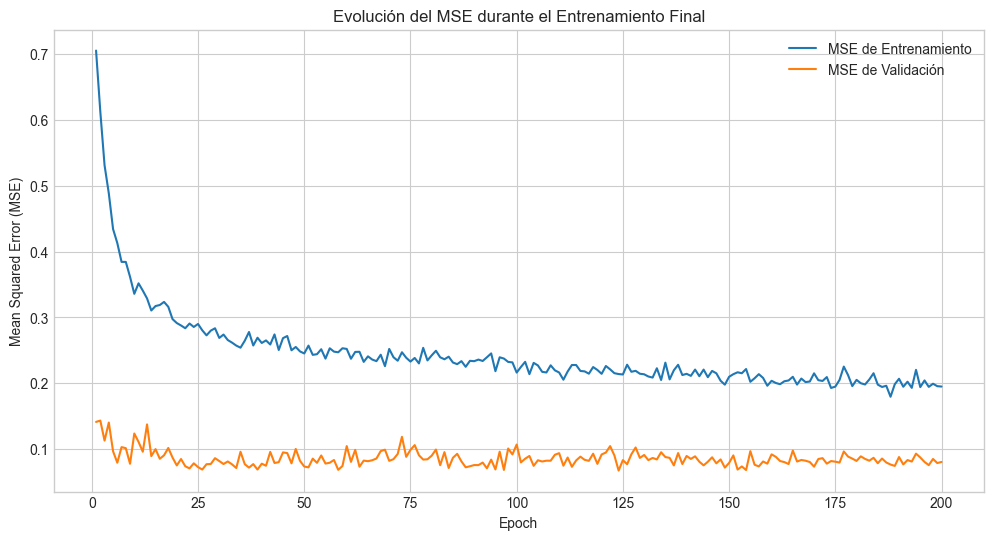


Generando pronósticos para 2022 (modo autoregresivo)...


Pronosticando por Barrio:   0%|          | 0/10 [00:00<?, ?it/s]


Archivo 'submission.csv' generado exitosamente.
Primeras 5 filas del archivo de predicciones:
          id    dengue
0  0_2022_01  1.547382
1  0_2022_02  1.678567
2  0_2022_03  1.717078
3  0_2022_04  1.899729
4  0_2022_05  2.464032


In [ ]:
# =============================================================================
# Bloque de Código para Jupyter Notebook (Versión Corregida y Mejorada)
# =============================================================================

# # Pronóstico de Casos de Dengue con Redes Convolucionales Temporales (TCN)

# ## 1. Carga de Librerías y Datos
# 
# En esta sección, importamos todas las librerías necesarias para el análisis y cargamos el conjunto de datos.

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
import optuna
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Configuraciones iniciales
plt.style.use('seaborn-v0_8-whitegrid')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Carga de datos
try:
    df = pd.read_parquet('../../Datos/df_train.parquet')
except FileNotFoundError:
    print("Error: Archivo '../../Datos/df_train.parquet' no encontrado.")
    print("Por favor, ajusta la ruta del archivo y vuelve a ejecutar.")
    # Creando un dataframe dummy para permitir que el resto del notebook se cargue sin errores.
    data = {'anio': [2020]*52 + [2021]*52, # Dummy data sin 2022 para replicar el error
            'semana': list(range(1, 53)) * 2,
            'id_bar': [1]*104, 'ESTRATO': [3]*104, 'dengue': np.random.randint(0, 10, 104),
            'area_barrio': [100]*104, 'concentraciones': [0.1]*104, 'vivienda': [500]*104, 
            'equipesado': [0.5]*104, 'sumideros': [20]*104, 'maquina': [1]*104,
            'lluvia_mean': [10]*104, 'lluvia_var': [2]*104, 'lluvia_max': [30]*104,
            'temperatura_mean': [25]*104, 'temperatura_var': [1]*104, 'temperatura_max': [30]*104, 'temperatura_min': [20]*104}
    df = pd.DataFrame(data)
    print("\nADVERTENCIA: Se ha creado un DataFrame de muestra. Los resultados no serán significativos.")


print("Dimensiones del DataFrame:", df.shape)
print("\nPrimeras filas del DataFrame:")
print(df.head())


# ## 2. Preprocesamiento y Feature Engineering
# 
# Aquí preparamos los datos para el modelo. Esto incluye:
# 1.  Crear una columna de tiempo cronológica.
# 2.  Codificar variables categóricas como índices numéricos para los `Embedding Layers`.
# 3.  Escalar las variables numéricas.
# 4.  Dividir los datos en conjuntos de entrenamiento, validación y pronóstico.

# --- Paso 1: Crear columna de tiempo y ordenar ---
df['date'] = pd.to_datetime(df['anio'].astype(str) + '-' + df['semana'].astype(str) + '-1', format='%Y-%W-%w')
df = df.sort_values(['id_bar', 'date']).reset_index(drop=True)

print("\nDataFrame ordenado con columna 'date':")
print(df.head())

# --- Definir columnas ---
CATEGORICAL_COLS = ['id_bar', 'ESTRATO']
NUMERICAL_COLS = [
    'area_barrio', 'concentraciones', 'vivienda', 'equipesado', 'sumideros', 
    'maquina', 'lluvia_mean', 'lluvia_var', 'lluvia_max', 'temperatura_mean', 
    'temperatura_var', 'temperatura_max', 'temperatura_min'
]
TARGET_COL = 'dengue'

# --- Paso 2: Codificar variables categóricas ---
label_encoders = {}
for col in CATEGORICAL_COLS:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
embedding_sizes = {col: len(le.classes_) for col, le in label_encoders.items()}
print(f"\nTamaños de Embedding: {embedding_sizes}")

# --- Paso 3: Dividir los datos ---
train_df = df[df['anio'] < 2021].copy()
val_df = df[df['anio'] == 2021].copy()
test_df = df[df['anio'] == 2022].copy()

# --- Paso 4: Escalar variables numéricas y el objetivo ---
num_scaler = StandardScaler()
train_df[NUMERICAL_COLS] = num_scaler.fit_transform(train_df[NUMERICAL_COLS])
val_df[NUMERICAL_COLS] = num_scaler.transform(val_df[NUMERICAL_COLS])

# ------ BLOQUE CORREGIDO ------
# Verificamos si test_df tiene datos antes de intentar escalarlo.
if not test_df.empty:
    test_df[NUMERICAL_COLS] = num_scaler.transform(test_df[NUMERICAL_COLS])
    print("Se encontraron y escalaron datos para el año 2022.")
else:
    print("\nADVERTENCIA: No se encontraron datos para el año 2022.")
    print("El modelo procederá con un pronóstico autoregresivo sin covariables futuras.")

target_scaler = StandardScaler()
train_df[TARGET_COL] = target_scaler.fit_transform(train_df[[TARGET_COL]])
val_df[TARGET_COL] = target_scaler.transform(val_df[[TARGET_COL]])

print(f"\nTamaño del conjunto de entrenamiento: {train_df.shape}")
print(f"Tamaño del conjunto de validación: {val_df.shape}")
print(f"Tamaño del conjunto de prueba (pronóstico): {test_df.shape}")
print("\nPreprocesamiento completado.")


# ## 3. Creación de Secuencias y Datasets
# 
# Convertimos los datos en secuencias de `(ventana_de_entrada, valor_objetivo)`.

def create_sequences(data, window_size, feature_cols, target_col):
    sequences = []
    labels = []
    for _, group in data.groupby('id_bar'):
        df_group = group.sort_values('date')
        if len(df_group) < window_size + 1:
            continue
        
        X = df_group[feature_cols].values
        y = df_group[target_col].values
        
        for i in range(len(df_group) - window_size):
            sequences.append(X[i:i + window_size])
            labels.append(y[i + window_size])
            
    return np.array(sequences), np.array(labels)

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# ## 4. Definición del Modelo TCN
# 
# Definimos la arquitectura de nuestra Red Convolucional Temporal (TCN).

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = nn.Conv1d(n_inputs, n_outputs, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(n_outputs, n_outputs, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TCNModel(nn.Module):
    def __init__(self, num_num_features, embedding_sizes, num_channels, kernel_size, dropout):
        super(TCNModel, self).__init__()
        
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_categories, 4) for _, num_categories in embedding_sizes.items()
        ])
        
        embedding_dim_sum = sum(e.embedding_dim for e in self.embeddings)
        input_size = num_num_features + embedding_dim_sum
        
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = input_size if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.tcn_network = nn.Sequential(*layers)
        self.linear = nn.Linear(num_channels[-1], 1)

    def forward(self, x_num, x_cat):
        embeddings_out = [emb(x_cat[:, :, i].long()) for i, emb in enumerate(self.embeddings)]
        embeddings_out = torch.cat(embeddings_out, dim=-1)
        x_combined = torch.cat([x_num, embeddings_out], dim=-1)
        x_permuted = x_combined.permute(0, 2, 1)
        y = self.tcn_network(x_permuted)
        y = self.linear(y[:, :, -1])
        return y.squeeze(-1)


# ## 5. Optimización de Hiperparámetros con Optuna
# 
# Usamos Optuna para encontrar la mejor combinación de hiperparámetros.

FEATURE_COLS = NUMERICAL_COLS + CATEGORICAL_COLS
NUM_CAT_FEATURES = len(CATEGORICAL_COLS)
NUM_NUM_FEATURES = len(NUMERICAL_COLS)

def objective(trial):
    window_size = trial.suggest_int('window_size', 8, 48, step=4)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    n_layers = trial.suggest_int('n_layers', 2, 4)
    num_channels_base = trial.suggest_categorical('num_channels_base', [16, 32, 64])
    num_channels = [num_channels_base] * n_layers
    kernel_size = trial.suggest_categorical('kernel_size', [2, 3, 4])
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128, 256])

    X_train, y_train = create_sequences(train_df, window_size, FEATURE_COLS, TARGET_COL)
    X_val, y_val = create_sequences(val_df, window_size, FEATURE_COLS, TARGET_COL)
    
    # Si no hay suficientes datos en validación para la ventana, el trial no es válido
    if len(X_val) == 0:
        raise optuna.exceptions.TrialPruned()

    train_dataset = TimeSeriesDataset(X_train, y_train)
    val_dataset = TimeSeriesDataset(X_val, y_val)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    model = TCNModel(
        num_num_features=NUM_NUM_FEATURES,
        embedding_sizes=embedding_sizes,
        num_channels=num_channels,
        kernel_size=kernel_size,
        dropout=dropout
    ).to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    epochs = 20
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            x_num = X_batch[:, :, :NUM_NUM_FEATURES]
            x_cat = X_batch[:, :, NUM_NUM_FEATURES:]
            optimizer.zero_grad()
            outputs = model(x_num, x_cat)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            x_num = X_batch[:, :, :NUM_NUM_FEATURES]
            x_cat = X_batch[:, :, NUM_NUM_FEATURES:]
            outputs = model(x_num, x_cat)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
    
    avg_val_loss = val_loss / len(val_dataset)
    trial.report(avg_val_loss, epoch)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return avg_val_loss

N_TRIALS = 100 
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)

print("\nOptimización de Hiperparámetros Completada.")
best_trial = study.best_trial
print(f"Mejor Valor (MSE): {best_trial.value}")
print("Mejores Parámetros: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")
best_params = best_trial.params


# ## 6. Entrenamiento del Modelo Final
# 
# Entrenamos un nuevo modelo con los mejores hiperparámetros, usando los datos de entrenamiento y validación combinados.

final_train_df = pd.concat([train_df, val_df], ignore_index=True)
print(f"\nTamaño del conjunto de entrenamiento final: {final_train_df.shape}")

final_window_size = best_params['window_size']
final_batch_size = best_params['batch_size']
final_epochs = 200

X_train_final, y_train_final = create_sequences(final_train_df, final_window_size, FEATURE_COLS, TARGET_COL)
X_val, y_val = create_sequences(val_df, final_window_size, FEATURE_COLS, TARGET_COL)

train_final_dataset = TimeSeriesDataset(X_train_final, y_train_final)
val_dataset = TimeSeriesDataset(X_val, y_val)

train_final_loader = DataLoader(train_final_dataset, batch_size=final_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=final_batch_size, shuffle=False)

n_layers = best_params['n_layers']
num_channels_base = best_params['num_channels_base']
num_channels = [num_channels_base] * n_layers

final_model = TCNModel(
    num_num_features=NUM_NUM_FEATURES,
    embedding_sizes=embedding_sizes,
    num_channels=num_channels,
    kernel_size=best_params['kernel_size'],
    dropout=best_params['dropout']
).to(device)

optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])
criterion = nn.MSELoss()

train_mse_history = []
val_mse_history = []

print("\nEntrenando modelo final...")
for epoch in tqdm(range(final_epochs), desc="Epochs"):
    final_model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_final_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        x_num = X_batch[:, :, :NUM_NUM_FEATURES]
        x_cat = X_batch[:, :, NUM_NUM_FEATURES:]
        optimizer.zero_grad()        
        outputs = final_model(x_num, x_cat)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * X_batch.size(0)

    final_model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            x_num = X_batch[:, :, :NUM_NUM_FEATURES]
            x_cat = X_batch[:, :, NUM_NUM_FEATURES:]
            outputs = final_model(x_num, x_cat)
            loss = criterion(outputs, y_batch)
            epoch_val_loss += loss.item() * X_batch.size(0)

    avg_train_loss = epoch_train_loss / len(train_final_dataset)
    avg_val_loss = epoch_val_loss / len(val_dataset)
    train_mse_history.append(avg_train_loss)
    val_mse_history.append(avg_val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{final_epochs}], Train MSE: {avg_train_loss:.6f}, Val MSE: {avg_val_loss:.6f}")
print("\nEntrenamiento final completado.")


# ## 7. Evaluación y Visualización
# 
# Graficamos el MSE para visualizar el rendimiento del modelo.

plt.figure(figsize=(12, 6))
plt.plot(range(1, final_epochs + 1), train_mse_history, label='MSE de Entrenamiento')
plt.plot(range(1, final_epochs + 1), val_mse_history, label='MSE de Validación')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Evolución del MSE durante el Entrenamiento Final')
plt.legend()
plt.show()


# ## 8. Generación de Pronósticos para 2022
# 
# Usamos el modelo final para un pronóstico autoregresivo, ya que no tenemos datos de covariables para 2022.

print("\nGenerando pronósticos para 2022 (modo autoregresivo)...")
final_model.eval()
predictions = []

# Usaremos todos los datos históricos (2015-2021) como base
historical_data = pd.concat([train_df, val_df], ignore_index=True)

# Iteramos sobre cada barrio para hacer las predicciones
for bar_id in tqdm(historical_data['id_bar'].unique(), desc="Pronosticando por Barrio"):
    
    history_bar = historical_data[historical_data['id_bar'] == bar_id].copy().sort_values('date')
    
    if len(history_bar) < final_window_size:
        print(f"Saltando barrio {bar_id}: no tiene suficientes datos históricos ({len(history_bar)} puntos).")
        # Si un barrio no tiene historia, predecimos 0 para todas las semanas de 2022
        for week_num in range(1, 53):
            predictions.append({'id_bar': bar_id, 'anio': 2022, 'semana': week_num, 'dengue': 0.0})
        continue

    # Tomamos las últimas `window_size` semanas de la historia como secuencia inicial
    input_sequence_df = history_bar.tail(final_window_size).copy()
    
    # Tomamos la última fila de covariables y la mantendremos constante para el futuro
    last_known_covariates = history_bar.tail(1).copy()
    
    # Bucle para cada semana de 2022
    for week_num in range(1, 53):
        # 1. Preparar la secuencia de entrada
        input_features = input_sequence_df[FEATURE_COLS].values
        input_tensor = torch.tensor(input_features, dtype=torch.float32).unsqueeze(0).to(device)
        
        x_num = input_tensor[:, :, :NUM_NUM_FEATURES]
        x_cat = input_tensor[:, :, NUM_NUM_FEATURES:]

        # 2. Realizar la predicción
        with torch.no_grad():
            predicted_scaled = final_model(x_num, x_cat).item()

        # 3. Invertir la escala de la predicción
        predicted_value = target_scaler.inverse_transform(np.array([[predicted_scaled]]))[0, 0]
        predicted_value = max(0, predicted_value) # El conteo de dengue no puede ser negativo

        # 4. Guardar la predicción
        predictions.append({
            'id_bar': bar_id,
            'anio': 2022,
            'semana': week_num,
            'dengue': predicted_value
        })

        # 5. Actualizar la secuencia de entrada para la siguiente predicción
        new_row = last_known_covariates.copy()
        # Actualizamos la columna objetivo con el valor predicho (escalado) para la siguiente iteración
        new_row[TARGET_COL] = predicted_scaled
        
        # Eliminamos el registro más antiguo y añadimos la nueva fila "predicha"
        input_sequence_df = pd.concat([input_sequence_df.iloc[1:], new_row], ignore_index=True)

# --- Crear y guardar el archivo de sumisión ---
pred_df = pd.DataFrame(predictions)
pred_df['id_bar'] = label_encoders['id_bar'].inverse_transform(pred_df['id_bar'])
pred_df['id'] = pred_df['id_bar'].astype(str) + '_' + \
                pred_df['anio'].astype(str) + '_' + \
                pred_df['semana'].astype(str).str.zfill(2)

submission_df = pred_df[['id', 'dengue']]
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M%S")
nombre_archivo = f'submission_TCN_{fecha_actual}.csv'
submission_df.to_csv(nombre_archivo, index=False)

print("\nArchivo 'submission.csv' generado exitosamente.")
print("Primeras 5 filas del archivo de predicciones:")
print(submission_df.head())